Wahlpflichtfach Künstliche Intelligenz II: Praktikum | [Startseite](index.ipynb)

---

# 03 - Testat zu Scikit-learn (sklearn)
__Gruppennummer:__ 4

__Mitglieder:__
- Jan Neitzner
- Lukas Hein
- Timo Marzok
- Yannick Buchmeier

In [1]:
%matplotlib inline

import pandas as pd
#import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

In diesem Testat werden Sie die unterschiedlichen Arbeitsschritte von der Datenvorverarbeitung über die Modell- und Teststrategieauswahl bis hin zur Evaluierung mit Hilfe von Scikit-learn durchführen. Dabei verwenden wir eine leicht modifizierte Variante des [California Housing Datasets](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). Dieses enthält die folgenden _acht_ Merkmale:
- __MedInc:__ Das mittlere Einkommen im Block
- __HouseAge:__ Das mittlere Hausalter im Block
- __AveRooms:__ Die durchschnittliche Raumanzahl pro Haushalt im Block
- __AveBedrms:__ Die durchschnittliche Schlafzimmeranzahl pro Haushalt im Block
- __Population:__ Die Bevölkerunganzahl im Block
- __AveOccup:__ Die durchschnittliche Anzahl von Personen pro Haushalt im Block
- __Latitude:__ Der Breitengrad des Blocks
- __Longitude:__ Der Längengrad des Blocks

Jedem Datenpunkt ist genau einer Klasse (_low_, _mid-low_, _mid_, _mid-high_, _high_) zugeordnet, die angibt, wie hoch der mittlere Hauswert im Block ist. Jede Klasse enthält ~20% der Datenpunkte.

## Aufgabe 0 - Data Understanding
__unbenotet__

Laden Sie die Daten und machen Sie sich mit ihnen vertraut. 

In [2]:
housing_df = pd.read_csv('california_housing_data.csv')
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Label
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,high
1,1.3578,40.0,4.524096,NaN,409.0,2.463855,37.85,-122.27,mid-low
2,2.0978,52.0,4.215190,1.060759,946.0,2.394937,37.83,-122.26,mid-low
3,3.3929,NaN,5.994652,1.128342,554.0,2.962567,37.83,-122.29,low
4,NaN,17.0,3.197232,1.000000,609.0,2.107266,37.81,-122.28,mid
...,...,...,...,...,...,...,...,...,...
1027,3.1908,16.0,4.386792,0.981132,1386.0,2.179245,38.54,-121.72,mid
1028,NaN,38.0,6.408696,1.039130,1123.0,2.441304,38.67,-121.78,mid-low
1029,2.8365,32.0,5.371901,1.060606,1145.0,3.154270,38.76,-121.77,low
1030,3.1029,18.0,4.945455,1.112121,769.0,2.330303,NaN,-121.57,low


Eventuell hilft Ihnen auch der folgende Graph.

In [3]:
#sns.set_theme(style="whitegrid")
#sns.pairplot(housing_df, hue="Label")

In [4]:
housing_df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Label          object
dtype: object

In [5]:
housing_df["Label"] = housing_df["Label"].astype("category")

## Aufgabe 1 - Data Preparation (4 Punkte)
Die erste Aufgabe ist es den Datensatz fürs maschinelle Lernen vorzubereiten. Dazu sind die folgenden Schritte nötig:
- a) Auswahl der Strategie(n) zum Ersetzen der fehlenden Werte
- b) Auswahl der Strategie(n) zur Skalierung der Daten
- c) Erstellen der Preparation-Pipeline

Da das Ersetzen der fehlenden Werte und die Skalierung der Daten in einer `Pipeline` passieren soll, können Sie nur Algorithmen verwenden, die __sklearn__ bereitstellt.

_Hinweise/Tipps:_ 
- Sie müssen die unterschiedlichen Algorithmen nicht (bis zum Maximum) optimieren, hier geht es gerade eher darum zu überprüfen, ob Sie die Algorithmen generell verstanden haben und Sie richtig einsetzen/kombinieren können.
- Gucken Sie sich nochmal die besprochenen Algorithmen an und überlegen wo die Stärken und Schwächen liegen.
- Sie können selbstverständlich auch unterschiedliche Methoden für die einzelnen Merkmale wählen.  

### a) Auswahl der Strategie(n) zum Ersetzen der fehlenden Werte
_Punkte: 1_

Als erstes müssen Sie sich eine Strategie zum Ersetzen der fehlenden Werte überlegen. Beschreiben Sie diese in der nachfolgenden Markdown-Zeile und begründen Sie, warum Sie diese Strategie gewählt haben. 

__Ihre Antwort:__
SimpleImputer()


### b) Auswahl der Strategie(n) zur Skalierung der Daten
_Punkte: 1_

Außerdem sollten die Daten skaliert/normalisiert werden. Beschreiben Sie Ihre Strategie und begründen Sie warum Sie diese Strategie bzw. Methoden gewählt haben.

__Ihre Antwort:__
StandardScaler()



### c) Erstellen der Preparation-Pipeline
_Punkte: 2_

In der nächsten Codezeile können Sie nun die `preparation_pipeline` erstellen. In dieser sollen beide vorherigen Schritte enthalten sein. Sie müssen die Pipeline aber noch nicht "trainieren" (Aufruf der Methode `fit()`).

In [6]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
# Hier können Sie die weiteren benötigten Imports hinzufügen

### BEGIN SOLUTION
pipe = Pipeline([
    ("mean_imputer", SimpleImputer()),
    ("scale", StandardScaler())
]
)
# IHRE LÖSUNG HIER
### END SOLUTION

Warum macht es noch keinen Sinn die Pipeline jetzt schon zu trainieren?

__Ihre Antwort:__

Um ein ML-Modell zu erstellen werden Trainings- und Testdatensätze benötigt. Nur so kann der ML-Algorithmus und dessen Performance ausgewertet werden. Hierfür muss der vorliegende Datensatz (housing_df) zunächst entsprechend unterteilt werden.

__Muster-Antwort:__
- Wir haben noch keine separaten Trainings- und Testdatensets und daher würden wir Testdaten zum Training verwenden.

## Aufgabe 2 - Trainingsvorbereitung und Modellauswahl  (4 Punkte)
Ihre nächste Aufgabe ist es das Training vorzubereiten und den richtigen ML-Algorithmus auszuwählen. Dafür müssen Sie die folgenden Teilaufgaben erledigen:
- a) Erstellen des Test- und Trainingsdatenset
- b) Kreuzvalidierung im Trainingsprozess
- c) Optimieren eines ML-Algorithmus
- d) Testen der trainierten Pipeline

### a) Erstellen des Test- und Trainingsdatenset
_Punkte: 0,5_

Zuerst benötigen wir ein Test- und ein Trainingsdatenset. Das Testdatenset soll 30% der gesamten Daten enthalten. 

In [7]:
# get the data and target from the data frame 
data = housing_df.loc[:, :'Longitude']
target = housing_df['Label']

### BEGIN SOLUTION
# IHRE LÖSUNG HIER
from sklearn.model_selection import train_test_split

#Die Funktion train_test_split() teilt die gegebenen Parameter in zufälliger Reihenfolge entsprechend der Testgröße.
train_data, test_data, train_label, test_label = train_test_split(data, target, test_size = 0.3)

#Überprüfen, ob die Größe der Daten korrekt ist.
assert round(len(data)*0.3) == len(test_data)
### END SOLUTION

### b) Kreuzvalidierung im Trainingsprozess
_Punkte: 1_

Was ist unter Kreuzvalidierung im Trainingsprozess zu verstehen und wieso wird es verwendet?

__Ihre Antwort:__

Durch eine Pipeline können verschiedene Berechnungen verkettet werden, wodurch sie einfacher wiederholt durchzuführen sind. Die Berechnungen können hierbei durch verschiedene Parameter (Hyperparameter) angepasst werden. Da oft die Parameter für die beste Vorhersageperformance nicht bekannt sind, müssen diese durchprobiert werden. <br>
Um die Performance zu messen und zu vergleichen wird der Datensatz, der zum Trainieren des ML-Modells genutzt wird, erneut aufgeteilt. Ein Bereich wird weiter für das Training des Modells benutzt, während der Rest zur Validierung genutzt wird. Da die Label-Daten des Validierungsdatensatzes bekannt sind, lässt sich hierraus die Genauigkeit der Vorhersagen berechnen.<br>
Ein Problem durch dieses Verfahren ist die Verkleinerung des Trainingsdatensatzes. Dem wird durch die Kreuzvalidierung entgegengewirkt. Der Trainingsdatensatz wird n mal in n-Teile aufgesplittet. Für jeden n-ten Durchgang wird der n-te Teil des Datensatzes als Validierungsdatensatz benutzt, während der verbliebene Datensatz zum Training des Modells genutzt werden kann. Durch die Iteration der verschiedenen Datensätze in Kombination mit den verschiedenen Pipeline-Parametern können die optimalen Parameter herausgefunden werden.

Innerhalb Scikit ist die Kreuzvalidierung durch sklearn.model_selection.GridSearchCV möglich


__Muster-Antwort:__
- Während des Trainings müssen unterschiedliche Hyperparameter optimiert werden.
- Um die optimalen Parameter auswählen zu können, muss auch getestet werden.
- Daher wird ein weiteres Datenset benötigt, das sogenannte Validierungsdatenset.
- Da dadurch die Daten fürs Training weiter schrumpfen, wurde die Kreuzvalidierung erfunden.
- Splitten der Trainingsdaten in $k$ Subsets. Das Netzwerk $k$ mal trainieren und dabei immer mit dem $k$ten Subset testen. Durchschnitt der Testergebnisse ist Gesamtergebnis für eine bestimmte Hyperparameterkombination.

### c) Optimieren eines ML-Algorithmus
_Punkte: 1,5_

Im nächsten Schritt optimieren wir einen ML-Algorithmus. Da wir ein Klassifikationsproblem lösen wollen, kommen nur Klassifikationsalgorithmen als mögliche Algorithmen in Frage. Wir werden den [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) verwenden. 

Der `RandomForestClassifier` soll eine maximale Tiefe von 6 haben und maximal 75% der Daten pro Baum verwenden. Setzen Sie den `random_state` auf 0. Für die Anzahl der Bäume sollen die folgenden Werte überprüft werden: `[30, 40, 50, 60, 70, 80]`. Außerdem sollen die beiden Möglichkeiten `['gini', 'entropy']` für das Kriterium, nach dem geteilt wird, getestet werden.

Führen Sie die folgenden Schritte durch:
- Erstellen Sie eine Pipeline, die zuerst die vorher bereits erstellte Vorverarbeitung durchführt und anschließend den `RandomForestClassifier` aufruft. 
- Finden Sie die optimalen Parameter aus den angegebenen Parameterbereichen.
- Speichern Sie die `Pipeline` mit den besten Parametern in der Variable `trained_pipeline`
- Geben Sie die beste `Pipeline` aus

In [8]:
from sklearn.ensemble import RandomForestClassifier
# Hier können Sie weitere benötigte Importe hinzufügen
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

### BEGIN SOLUTION
pipe = Pipeline([
                ("mean_imputer", SimpleImputer()), #NaN Werte mit Mittelwert befüllen
                ("scale", StandardScaler()),
                ("classifier", RandomForestClassifier(
                    max_depth=6, #maximale Tiefe von 6
                    max_samples=0.75, #maximal 75% der Daten pro Baum
                    random_state=0))
                ]
)
### END SOLUTION

In [9]:
model = GridSearchCV(estimator=pipe,
                     param_grid={
                         'classifier__criterion':['gini', 'entropy'],
                         'classifier__n_estimators' : [30, 40, 50, 60, 70, 80]},
                     cv=3 #Cross Validation
)

In [10]:
model.fit(train_data, train_label)
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037568,0.001696,0.004317,4.737046e-04,gini,30,"{'classifier__criterion': 'gini', 'classifier_...",0.489627,0.560166,0.483333,0.511042,0.034831,7
1,0.046551,0.000457,0.004987,2.973602e-07,gini,40,"{'classifier__criterion': 'gini', 'classifier_...",0.485477,0.568465,0.475000,0.509647,0.041810,10
2,0.058530,0.003066,0.006632,4.794484e-04,gini,50,"{'classifier__criterion': 'gini', 'classifier_...",0.460581,0.560166,0.479167,0.499971,0.043235,11
3,0.069216,0.002040,0.007314,4.701340e-04,gini,60,"{'classifier__criterion': 'gini', 'classifier_...",0.464730,0.551867,0.475000,0.497199,0.038883,12
4,0.075855,0.000722,0.007354,4.630226e-04,gini,70,"{'classifier__criterion': 'gini', 'classifier_...",0.485477,0.556017,0.487500,0.509665,0.032786,8
5,0.088920,0.002507,0.008716,8.894110e-04,gini,80,"{'classifier__criterion': 'gini', 'classifier_...",0.477178,0.564315,0.487500,0.509665,0.038873,8
6,0.042015,0.000434,0.004028,5.383593e-05,entropy,30,"{'classifier__criterion': 'entropy', 'classifi...",0.502075,0.547718,0.491667,0.513820,0.024343,5
7,0.054162,0.000896,0.004760,4.608709e-04,entropy,40,"{'classifier__criterion': 'entropy', 'classifi...",0.493776,0.576763,0.504167,0.524902,0.036916,2
8,0.067084,0.000226,0.005350,4.302757e-04,entropy,50,"{'classifier__criterion': 'entropy', 'classifi...",0.485477,0.572614,0.500000,0.519364,0.038118,3
9,0.087172,0.004871,0.006991,8.026424e-04,entropy,60,"{'classifier__criterion': 'entropy', 'classifi...",0.481328,0.572614,0.525000,0.526314,0.037279,1


In [11]:
model.best_params_

{'classifier__criterion': 'entropy', 'classifier__n_estimators': 60}

Der beste Wert für den Parameter 'citerion' ist 'entropy'. <br>
Der beste Wert für den Parameter 'n_estimators' ist 70.

In [12]:
trained_pipeline = model.best_estimator_

In [13]:
trained_pipeline

Pipeline(steps=[('mean_imputer', SimpleImputer()), ('scale', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=6,
                                        max_samples=0.75, n_estimators=60,
                                        random_state=0))])

### d) Testen der trainierten Pipeline
_Punkte: 1_

Nachdem Sie die `Pipeline` trainiert haben, ist es nun Zeit diese zu testen. Lassen Sie sich dafür den Score einmal für das Test- und einmal für das Trainingsdatenset berechnen. Was fällt auf? Welche Metrik wird für das berechnen verwendet bzw. was sagt sie aus? Ist diese Metrik hier sinnvoll?

In [14]:
### BEGIN SOLUTION
# IHRE LÖSUNG HIER
from sklearn.metrics import accuracy_score

predict_train = model.predict(train_data)
predict_test = model.predict(test_data)
print(accuracy_score(train_label, predict_train))
print(accuracy_score(test_label, predict_test))
### END SOLUTION

0.817174515235457
0.5129032258064516


__Ihre Antwort:__ Model ist auf die Testdaten angepasst.


## Aufgabe 3 - Weitere Evaluierung und Visualisierung (2 Punkte)
Im letzten Schritt wollen wir uns die Ergebnisse noch einmal genauer angucken, um eventuell zu verstehen, was passiert ist. Dazu sind die folgenden Teilaufgaben zu erledigen:
- a) Erstellen eines Confusion Matrix-Diagramms
- b) Analyse des Einfluss des Parameters n_estimators auf das Ergebnis

### a) Erstellen eines Confusion Matrix-Diagramms
_Punkte: 1_

Erstellen Sie mit Hilfe der `plot_confusion_matrix`-Funktion das Diagramm der Confusion Matrix. Analysieren Sie dieses anschließend.

_Tipps:_
- Welche Klassen wurden falsch klassifiziert?
- Was könnten mögliche Gründe dafür sein?

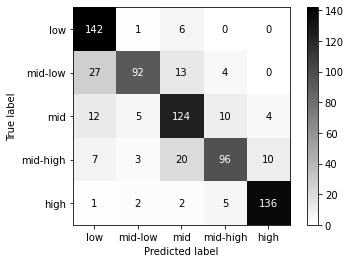

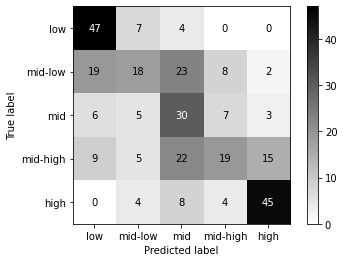

In [15]:
from sklearn.metrics import plot_confusion_matrix

### BEGIN SOLUTION
labels = ['low', 'mid-low', 'mid', 'mid-high', 'high']

#Confusion Matrix mit Trainingsdaten
_ = plot_confusion_matrix(estimator=model, #trainiertes Modell, das zur Vorhersage genutzt wrid
                          X=train_data, #Daten für das Vorhersagen der Werte
                          y_true=train_label, # erwartete Werte der Vorhersagen
                          cmap='binary', # Farbschema
                          labels=labels) #Sortierung der Achsen)

#Confusion Matrix mit Testdaten
_ = plot_confusion_matrix(estimator=model,
                          X=test_data,
                          y_true=test_label,
                          cmap='binary',
                          labels=labels)
### END SOLUTION

__Ihre Antwort:__

### b) Analyse des Einfluss des Parameters n_estimators auf das Ergebnis
_Punkte: 1_

Zum Schluss wollen wir noch einmal analysieren welchen Einfluss der Parameter `n_estimators` auf das Trainingsergebnis hat. Verwenden Sie dafür die Funktion `validation_curve`, um für den getesteten Parameterbereich des Parameters die nötigen Daten zu sammeln. Speichern Sie die Rückgabe in den Variablen `train_scores` und `valid_score`. Erstellen Sie außerdem eine Variable `n_estimators`, die alle möglichen Werte für den Parameter enthält. 

Welche Rückschlüsse lässt das Diagramm zu?

In [16]:
from sklearn.model_selection import validation_curve

### BEGIN SOLUTION
# IHRE LÖSUNG HIER
### END SOLUTION

In [17]:
# first, calculate the means and standard deviations
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

# create the figure
plt.figure(figsize=(10, 10))
plt.title("Validation Curve of RandomForestClassifier with different n_estimators values")
plt.xlabel("n_estimators")
plt.ylabel("Score")
# plot the training score
plt.plot(n_estimators, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_estimators, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, 
                 color="darkorange",
                 alpha=0.2
                )
# plot the validation score
plt.plot(n_estimators, valid_scores_mean, label="Cross-validation score", color="navy")
plt.fill_between(n_estimators, 
                 valid_scores_mean - valid_scores_std, 
                 valid_scores_mean + valid_scores_std, 
                 color="navy",
                 alpha=0.2
                )

plt.legend(loc="best")
plt.show()

NameError: name 'train_scores' is not defined

__Ihre Antwort:__

---

Wahlpflichtfach Künstliche Intelligenz II: Praktikum | [Startseite](index.ipynb)